# Recall Probability by Lag


> "The beneficial mnemonic effects of spaced over massed learning is one of the most widely documented and well studied memory phenomena. Although it is seen in a wide range of tasks, the spacing effect is particularly strong in free recall, where the probability of recalling a repeated word often increases monotonically to spacings of 20 or more items (Cepeda, Pashler, Vul, Wixted, & Rohrer, 2006; Delaney, Verkoeijen, & Spirgel, 2010; Donovan & Radosevich, 1999; Madigan, 1969; Melton, 1970)." - Lohnas & Kahana, 2014

In [1]:
import os
from jaxcmr.helpers import load_data, generate_trial_mask, find_project_root
from jaxcmr.analyses.rpl import plot_rpl, binned_recall_probability_by_lag, infer_max_lag, plot_full_rpl
from jaxcmr.repetition import make_control_dataset


[0.3727891  0.43928573 0.47678572 0.5571428  0.57857144]


/Users/jordangunn/jaxcmr/jaxcmr/analyses/rpl.py:277: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(xticklabels) # type: ignore
/Users/jordangunn/jaxcmr/jaxcmr/analyses/rpl.py:211: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis.set_xticklabels(xticklabels) # type: ignore


<Axes: xlabel='Lag', ylabel='Recall Rate'>

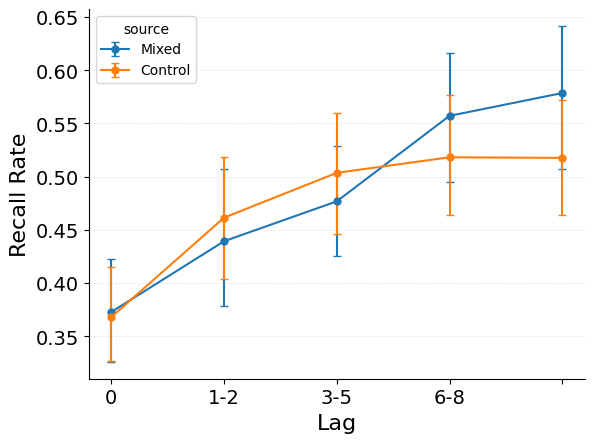

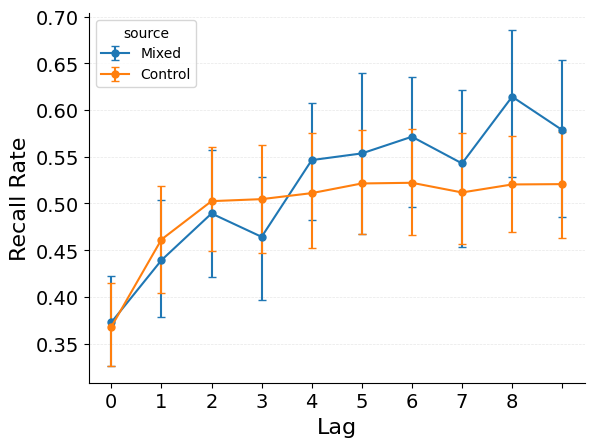

In [2]:
# parameters
data_name = "LohnasKahana2014"
data_query = "data['list_type'] == 4"
ctrl_query = "data['list_type'] == 1"

data_path = os.path.join(find_project_root(), "data/LohnasKahana2014.h5")

# set up data structures
data = load_data(data_path)
recalls = data["recalls"]
presentations = data["pres_itemnos"]
list_length = data["listLength"][0].item()
trial_mask = generate_trial_mask(data, data_query)

print(binned_recall_probability_by_lag(
    recalls[trial_mask], presentations[trial_mask], list_length, infer_max_lag(presentations[trial_mask], list_length)
))

control_dataset = make_control_dataset(data, data_query, ctrl_query, 10)
plot_rpl([data, control_dataset], [generate_trial_mask(data, data_query), generate_trial_mask(control_dataset, data_query)], labels=["Mixed", "Control"], contrast_name="source")
plot_full_rpl([data, control_dataset], [generate_trial_mask(data, data_query), generate_trial_mask(control_dataset, data_query)], labels=["Mixed", "Control"], contrast_name="source")